# RL Examples for Lecture 7

In [13]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf, rlocus, step, feedback, lsim, bode
from control import pade

from control_materials import *

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found


## Phase Calculations with Complex Poles

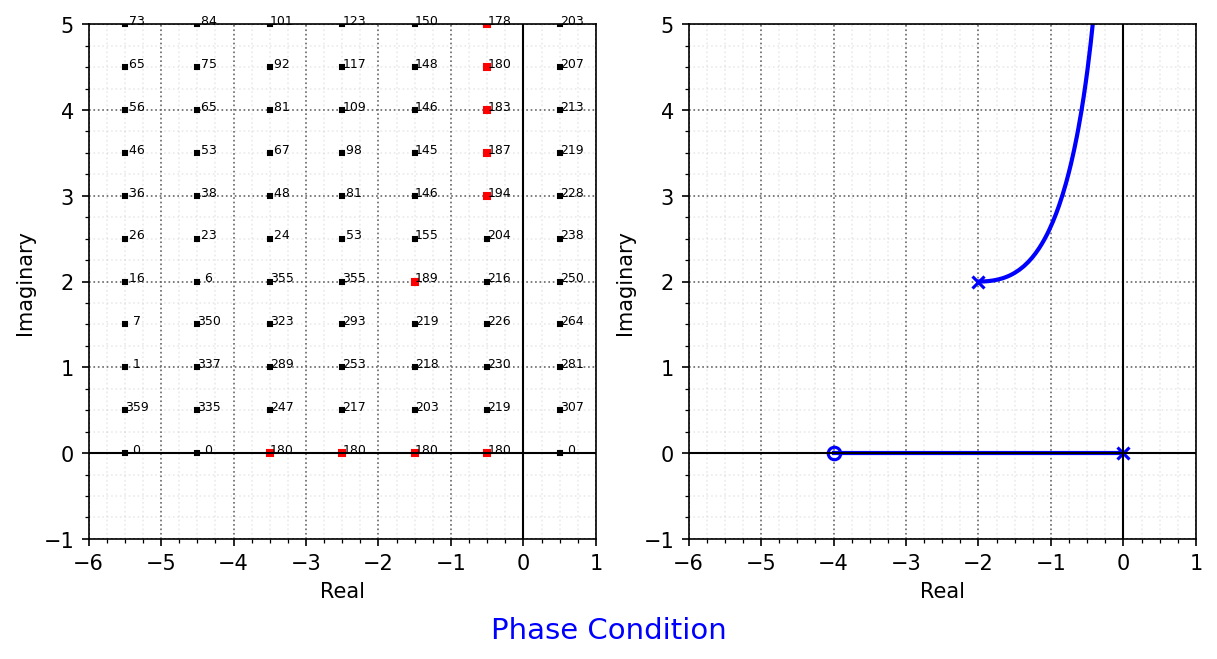

In [14]:
G = tf((1, 4), np.convolve((1,4,8),(1, 0)))

def jphase(G,s0):
    phi_fromG = sum([cmath.phase(x) for x in (s0 - G.zeros())])*180/np.pi - \
                sum([cmath.phase(x) for x in (s0 - G.poles())])*180/np.pi
    return phi_fromG % 360

Npts = 7
re = np.linspace(-5.5, .5, Npts)
im = np.linspace(0, 5, Npts+4)

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
for jj,j in enumerate(re):
    for ii,i in enumerate(im):
        res = jphase(G,complex(j,i))
        if abs(res - 180) < 15:
            ax[0].plot(j,i,'rs',ms=3)
        else:
            ax[0].plot(j,i,'ks',ms=2)           
        ax[0].text(j,i,r"{:3.0f}".format(np.round(res,0)),size=6)
rlocus(G,ax=ax[1],grid=False,color='b')
ax[0].set_ylim((-1,5))
ax[0].set_xlim((-6,1))
ax[1].set_ylim((-1,5))
ax[1].set_xlim((-6,1))
nicegrid(ax,-1)

caption("Phase Condition",fig)
for kk in range(2):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/Phase_cond.pdf", dpi=600)
plt.show()

## Real Line

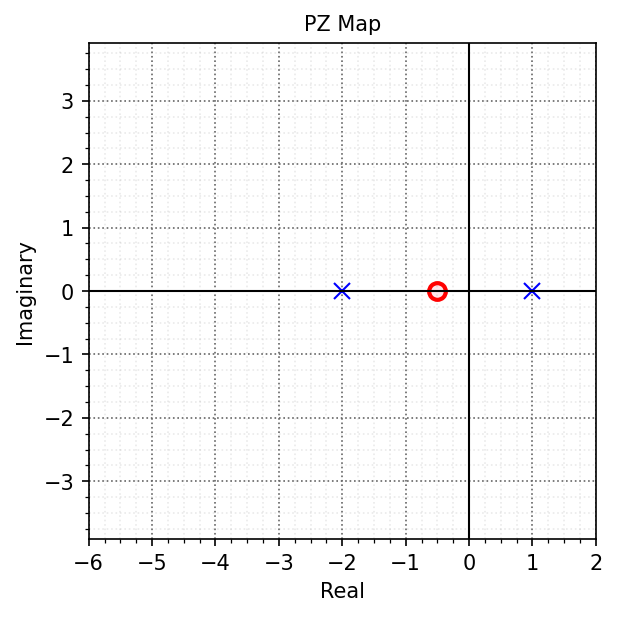

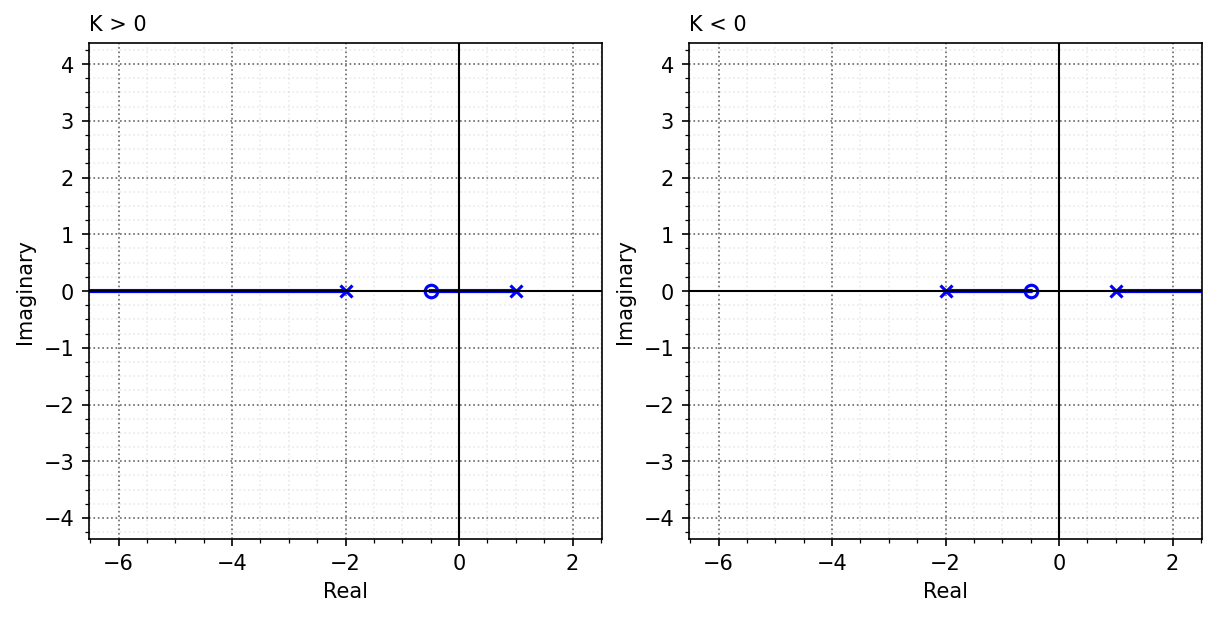

In [15]:
G = tf((1, 0.5), (1, 1, -2))
fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
my_pzmap(G,ax)
ax.axis('equal')
ax.set_xlim([-6, 2]);ax.set_ylim([-1, 1])
nicegrid(ax,-1)
ax.set_title('PZ Map')
savefig("./figs/RL_ex1_pzmap.pdf", dpi=600)
plt.show()

klist = Root_Locus_gains(G)
fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=klist, grid=False,color='b',ax=ax[0])
ax[0].axis('equal')
ax[0].set_xlim([-6, 2]);ax[0].set_ylim([-1, 1])
nicegrid(ax[0],-1)
ax[0].set_title('K > 0',loc='left')

klist = Root_Locus_gains(G)
rlist, klist = rlocus(G, kvect=-klist, grid=False,color='b',ax=ax[1])
ax[1].axis('equal')
ax[1].set_xlim([-6, 2]);ax[1].set_ylim([-1, 1])
nicegrid(ax[1],-1)
ax[1].set_title('K < 0',loc='left')
for kk in range(2):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/RL_ex1.pdf", dpi=600)
plt.show()

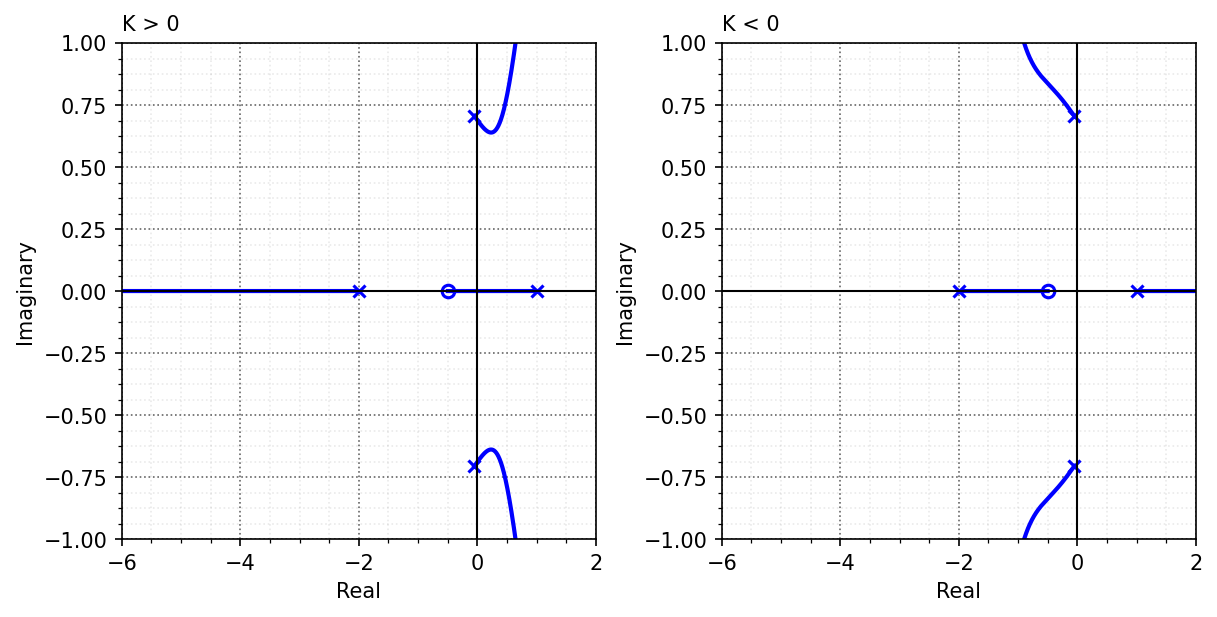

In [16]:
Gr = G*tf((1), (1, .1, .5))
klist = Root_Locus_gains(G)
fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(Gr, kvect=klist, grid=False,color='b',ax=ax[0])
ax[0].set_xlim([-6, 2]);ax[0].set_ylim([-1, 1])
nicegrid(ax[0])
ax[0].set_title('K > 0',loc='left')

klist = Root_Locus_gains(Gr)
rlist, klist = rlocus(Gr, kvect=-klist, grid=False,color='b',ax=ax[1])
ax[1].set_xlim([-6, 2]);ax[1].set_ylim([-1, 1])
nicegrid(ax[1])
ax[1].set_title('K < 0',loc='left')
for kk in range(2):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/RL_ex1_2.pdf", dpi=600)
plt.show()

## Center of Mass

For G0

Found breakin/out at K = -0.000
At possible locations s = 0.000

For G1

Found breakin/out at K = 2.726
At possible locations s = -2.266

Found breakin/out at K = 0.000
At possible locations s = 0.000


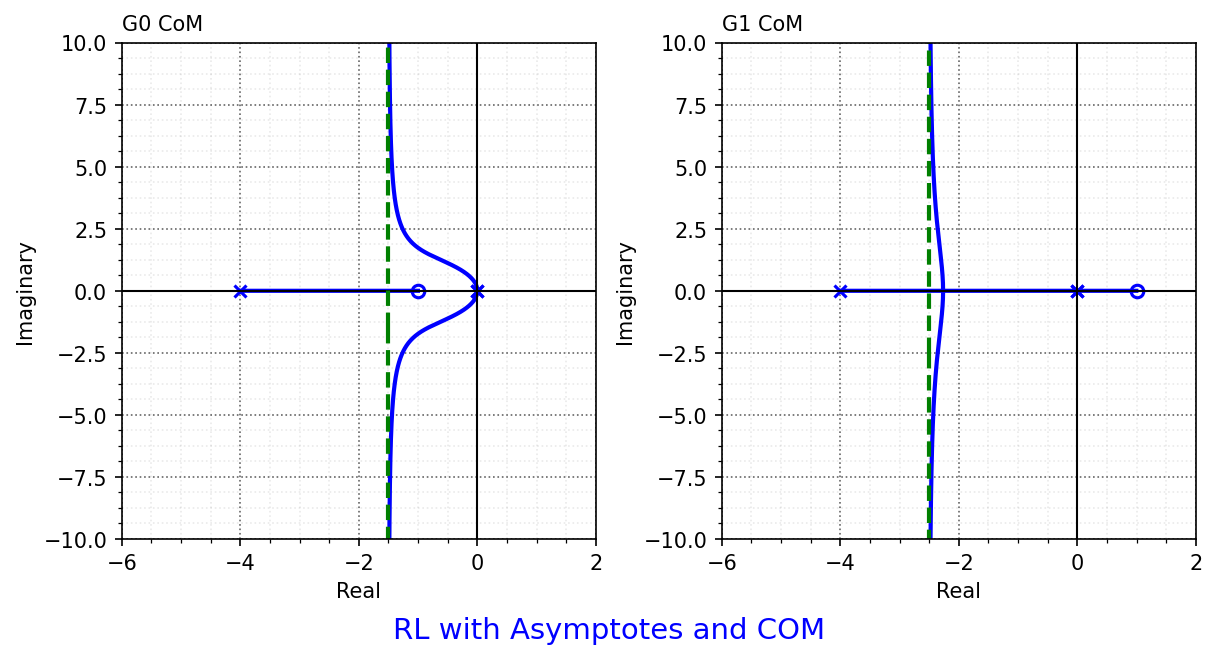

In [17]:
# 7-20
G0 = tf((1, 1), np.convolve((1,0,0),(1, 4)))
G1 = tf((1, -1), np.convolve((1,0,0),(1, 4)))

CoM0, Ang0 = RL_COM(G0)
CoM1, Ang1 = RL_COM(G1)

print("For G0")
fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0), grid=False,color='b',ax=ax[0])
ax[0].set_xlim([-6, 2]);ax[0].set_ylim([-10, 10])
nicegrid(ax[0])
ax[0].set_title('G0 CoM',loc='left')
ax[0].plot(np.real(CoM0)+[0,10],np.real(CoM0)+[0,10*np.tan(Ang0/r2d)],'g--')
ax[0].plot(np.real(CoM0)+[0,10],np.real(CoM0)+[0,10*np.tan(-Ang0/r2d)],'g--')

print("\nFor G1")
rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist), grid=False,color='b',ax=ax[1])
ax[1].set_xlim([-6, 2]);ax[1].set_ylim([-10, 10])
nicegrid(ax[1])
ax[1].set_title('G1 CoM',loc='left')
ax[1].plot(np.real(CoM1)+[0,10],np.real(CoM1)+[0,10*np.tan(Ang1/r2d)],'g--')
ax[1].plot(np.real(CoM1)+[0,10],np.real(CoM1)+[0,10*np.tan(-Ang1/r2d)],'g--')
caption("RL with Asymptotes and COM",fig)
for kk in range(2):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
fig.savefig('./figs/RL_com.pdf', dpi=300)
plt.show()

## Root Locus Examples 7-24


Found breakin/out at K = -0.000
At possible locations s = 0.000

Found breakin/out at K = -0.000
At possible locations s = 0.000

Found breakin/out at K = -0.000
At possible locations s = 0.000

Found breakin/out at K = -0.000
At possible locations s = 0.000

Found breakin/out at K = -0.000
At possible locations s = 0.000

Found breakin/out at K = -0.000
At possible locations s = 0.000


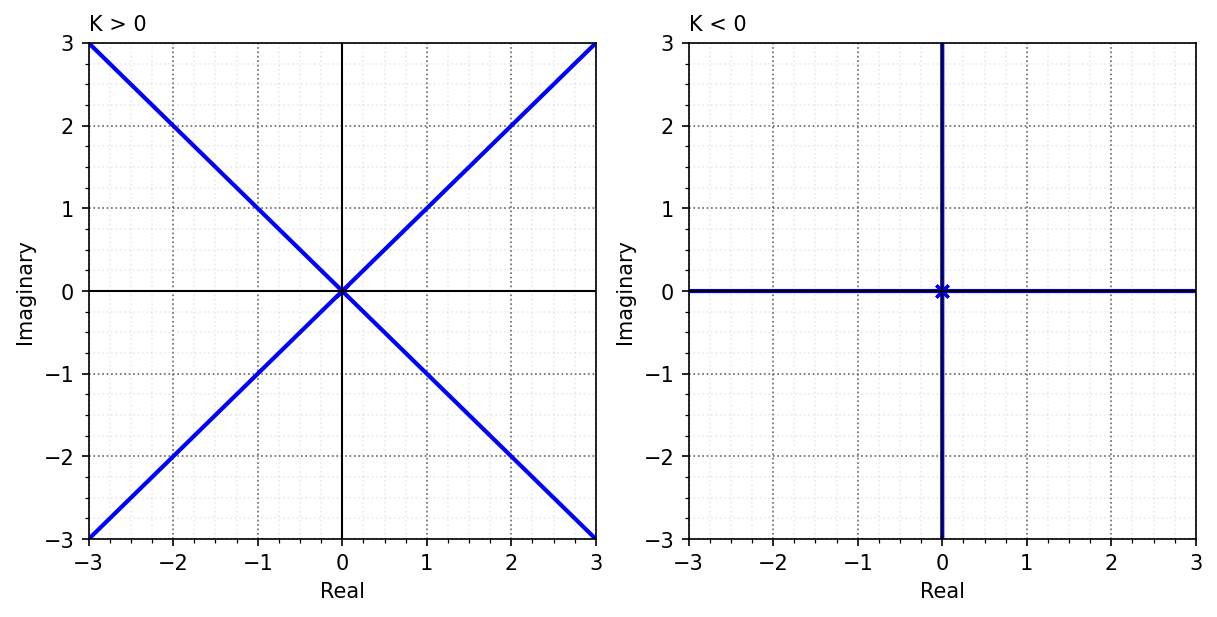

In [18]:
G = tf((1), (1, 0))**4

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), grid=False,color='b',ax=ax[0])
ax[0].set_xlim([-3, 3]);ax[0].set_ylim([-3, 3])
nicegrid(ax[0])
ax[0].set_title('K > 0',loc='left')

rlist, klist = rlocus(G, kvect=Root_Locus_gains(G,Krange=-klist), grid=False,color='b',ax=ax[1])
ax[1].set_xlim([-3, 3]);ax[1].set_ylim([-3, 3])
nicegrid(ax[1])
ax[1].set_title('K < 0',loc='left')
for kk in range(2):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/Ex9_21a.pdf", dpi=600)
plt.show()

K > 0

Found breakin/out at K = -0.000
At possible locations s = 0.000

Found breakin/out at K = 2.726
At possible locations s = 2.266

K < 0

Found breakin/out at K = -23.476
At possible locations s = -1.766

Found breakin/out at K = -0.000
At possible locations s = 0.000


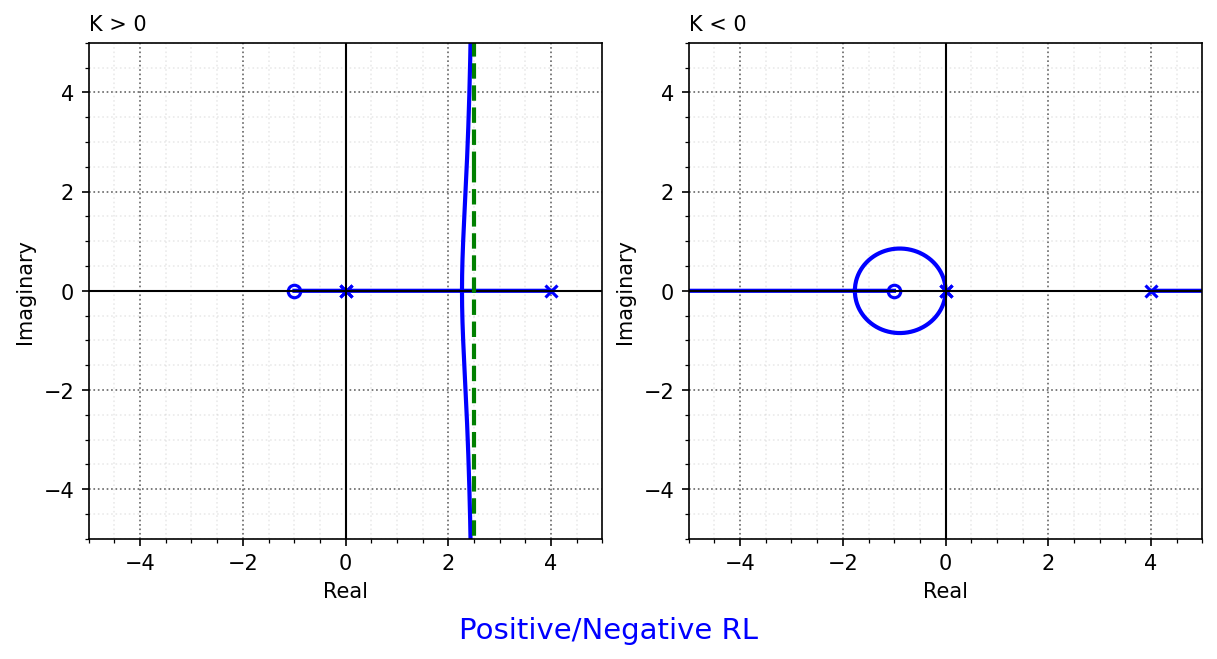

In [19]:
G = tf((1, 1), np.convolve((1,0,0),(1, -4)))

print("K > 0")
fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), grid=False,color='b',ax=ax[0])
nicegrid(ax[0])
ax[0].set_title('K > 0',loc='left')

CoM0, Ang0 = RL_COM(G)
ax[0].plot(np.real(CoM0)+[0,10],np.real(CoM0)+[0,10*np.tan(Ang0/r2d)],'g--')
ax[0].plot(np.real(CoM0)+[0,10],np.real(CoM0)+[0,10*np.tan(-Ang0/r2d)],'g--')

print("\nK < 0")
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G,standard_locus=False), grid=False,color='b',ax=ax[1])

nicegrid(ax[1])
ax[1].set_title('K < 0',loc='left')
caption("Positive/Negative RL",fig)
for kk in range(2):
    ax[kk].set_xlim([-5, 5]);
    ax[kk].set_ylim([-5, 5])
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/Ex9_21b.pdf", dpi=600)
plt.show()


### shift LHP zero right

K > 0

Found breakin/out at K = -0.000
At possible locations s = 0.000

Found breakin/out at K = 3.227
At possible locations s = 2.171
K < 0

Found breakin/out at K = -9.915
At possible locations s = -0.921

Found breakin/out at K = -0.000
At possible locations s = 0.000


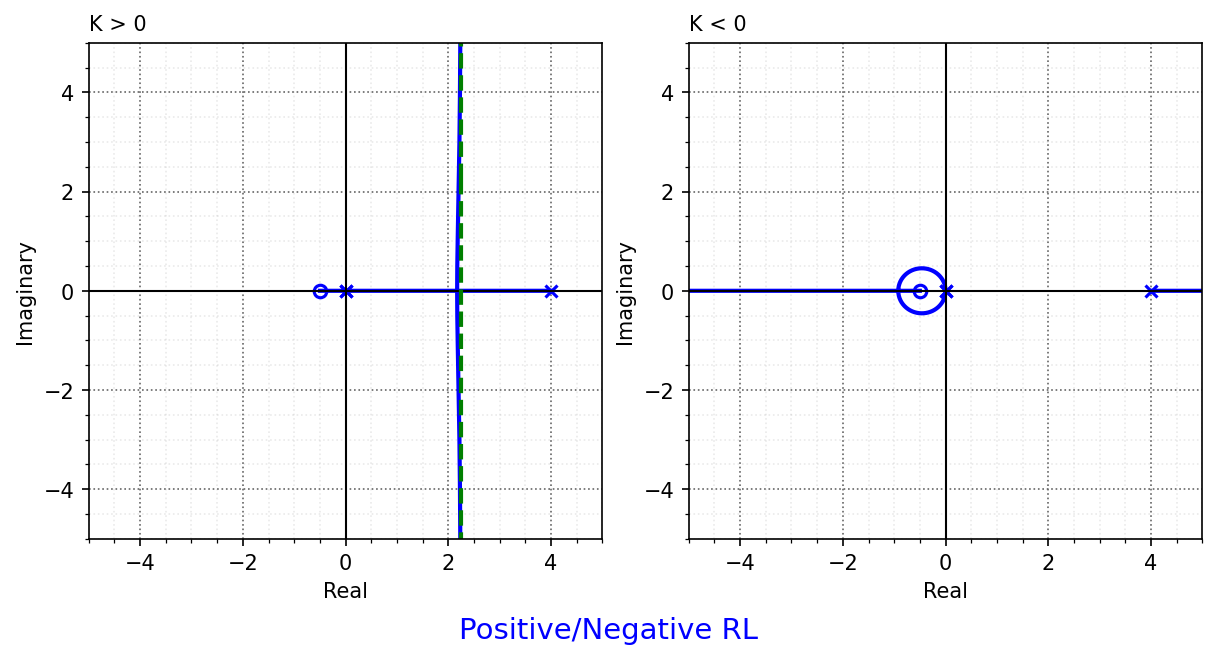

In [20]:
G = tf((1, 0.5), np.convolve((1,0,0),(1, -4)))

print("K > 0")
fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), grid=False,color='b',ax=ax[0])
nicegrid(ax[0])
ax[0].set_title('K > 0',loc='left')

CoM0, Ang0 = RL_COM(G)
ax[0].plot(np.real(CoM0)+[0,10],np.real(CoM0)+[0,10*np.tan(Ang0/r2d)],'g--')
ax[0].plot(np.real(CoM0)+[0,10],np.real(CoM0)+[0,10*np.tan(-Ang0/r2d)],'g--')

print("K < 0")
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G,standard_locus=False), grid=False,color='b',ax=ax[1])
nicegrid(ax[1])
ax[1].set_title('K < 0',loc='left')
caption("Positive/Negative RL",fig)
for kk in range(2):
    dim = 5
    ax[kk].set_xlim([-dim, dim]);
    ax[kk].set_ylim([-dim,dim])
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/Ex9_21c.pdf", dpi=600)
plt.show()

## RL Examples


K > 0

Found breakin/out at K = -0.000
At possible locations s = 0.000

K < 0

Found breakin/out at K = -0.000
At possible locations s = 0.000


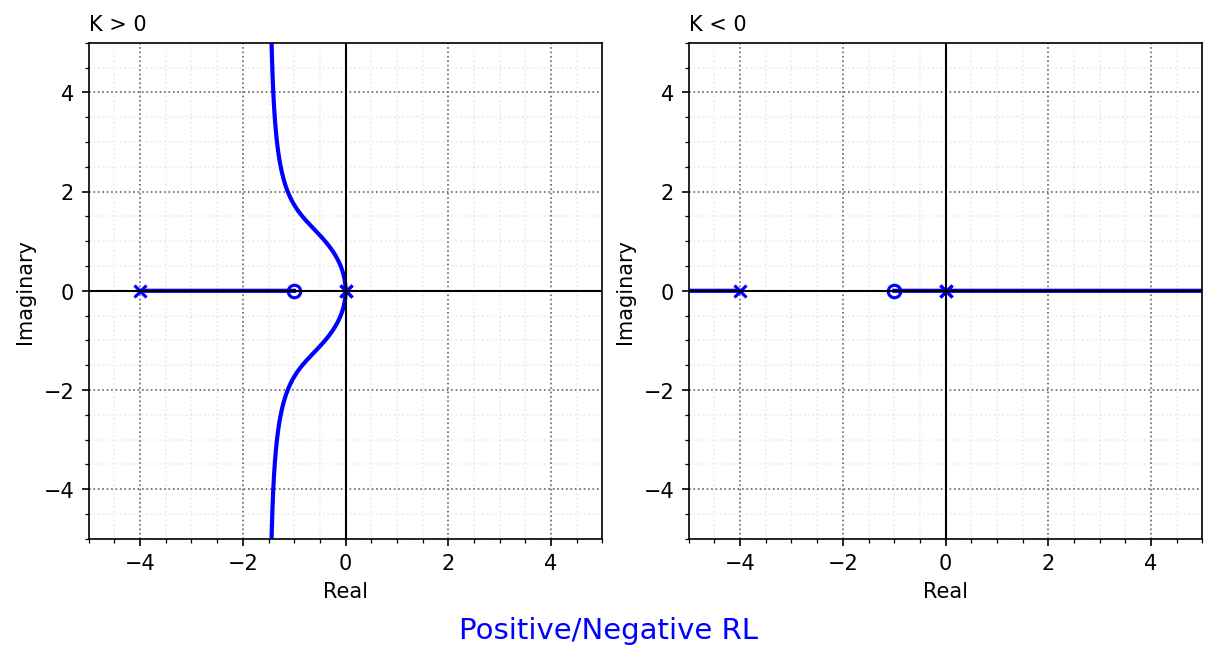

In [21]:
G = tf((1, 1), np.convolve((1,0,0),(1, 4)))

print("\nK > 0")
fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G,Tol = 1e-3), grid=False,color='b',ax=ax[0])
nicegrid(ax[0])
ax[0].set_title('K > 0',loc='left')

print("\nK < 0")
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G,Tol = 1e-3,standard_locus=False), grid=False,color='b',ax=ax[1])
nicegrid(ax[1])
ax[1].set_title('K < 0',loc='left')
for kk in range(2):
    ax[kk].set_xlim([-5, 5]);
    ax[kk].set_ylim([-5, 5])
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
caption("Positive/Negative RL",fig)
plt.show()


K > 0

Found breakin/out at K = 3.000
At possible locations s = -2.000
K < 0

Found breakin/out at K = -1.000
At possible locations s = 0.000


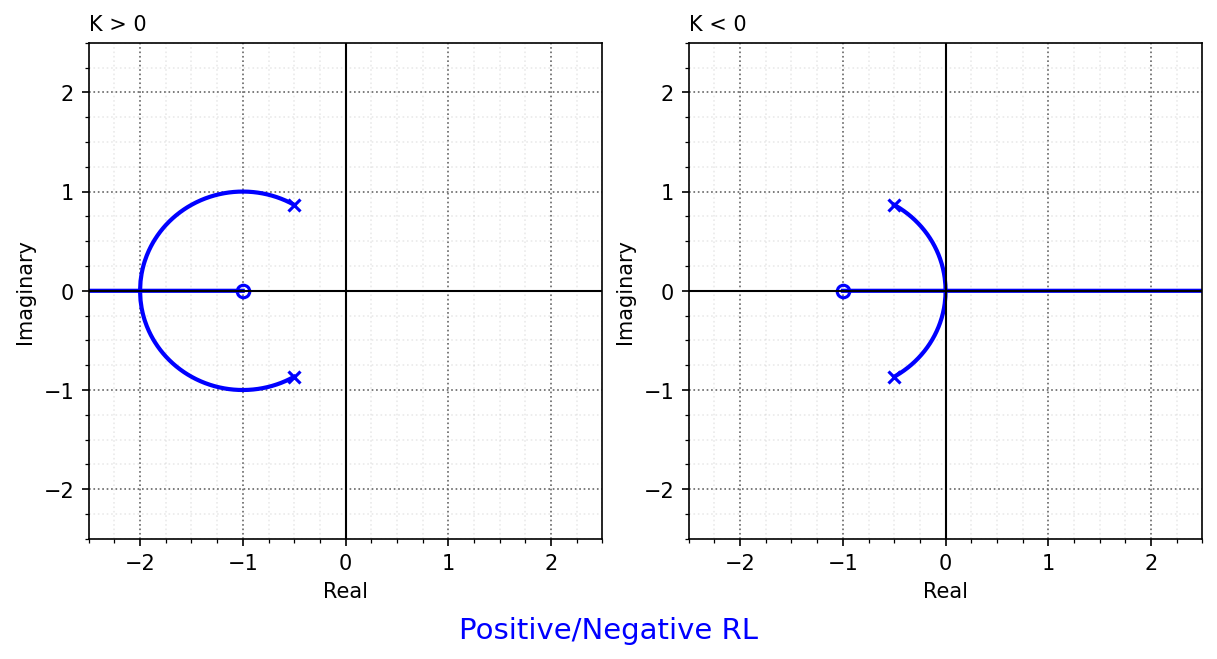

In [22]:
G = tf((1, 1), np.convolve((1,1,1),(0, 1)))

print("K > 0")
fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), grid=False,color='b',ax=ax[0])
nicegrid(ax[0])
ax[0].set_title('K > 0',loc='left')

print("K < 0")
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G,standard_locus=False), grid=False,color='b',ax=ax[1])
nicegrid(ax[1])
ax[1].set_title('K < 0',loc='left')
for kk in range(2):
    dim = 2.5
    ax[kk].set_xlim([-dim, dim]);
    ax[kk].set_ylim([-dim, dim])
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
caption("Positive/Negative RL",fig)
plt.show()


## Four examples on 7-25


Found breakin/out at K = 3.949
At possible locations s = -2.225


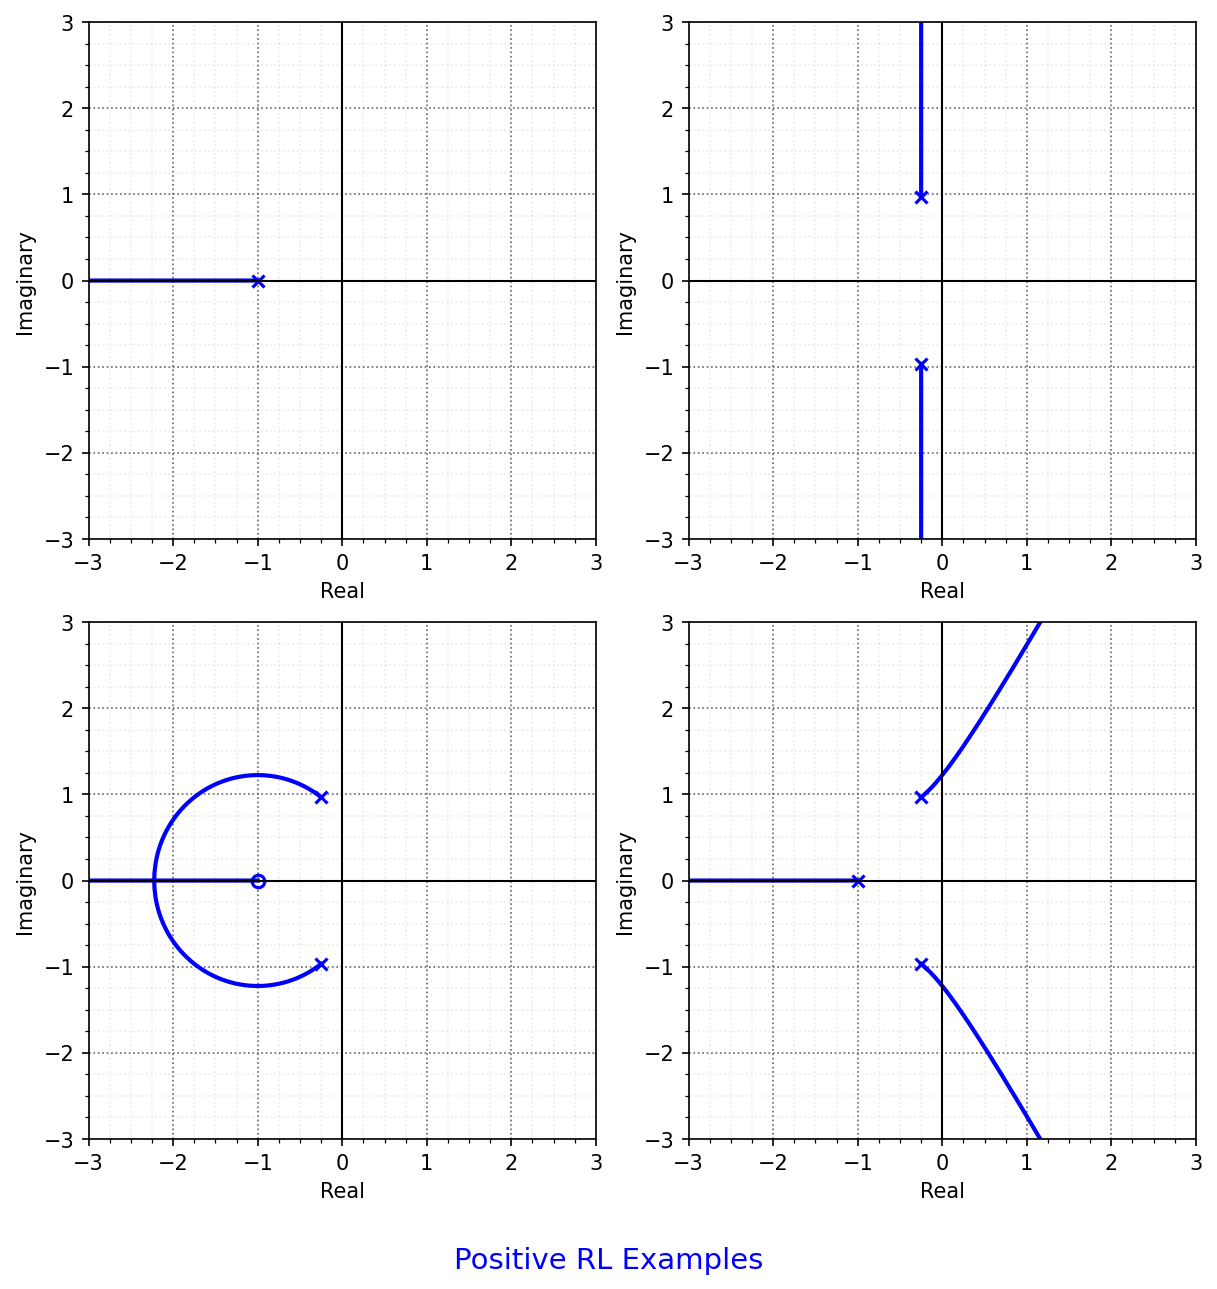

In [23]:
G0 = tf((1), np.convolve((1),(1, 1)))
G1 = tf((1), np.convolve((1,.5,1),(0, 1)))
G2 = tf((1, 1), np.convolve((1,.5,1),(0, 1)))
G3 = tf((1), np.convolve((1,.5,1),(1, 1)))

fig, ax = plt.subplots(2,2,figsize=(8, 8),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0), grid=False,color='b',ax=ax[0,0])
rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1), grid=False,color='b',ax=ax[0,1])
rlist, klist = rlocus(G2, kvect=Root_Locus_gains(G2), grid=False,color='b',ax=ax[1,0])
rlist, klist = rlocus(G3, kvect=Root_Locus_gains(G3), grid=False,color='b',ax=ax[1,1])

[ax[x,y].set_xlim([-4, 1]) for x in range(2) for y in range(2)]
[ax[x,y].set_ylim([-4, 4]) for x in range(2) for y in range(2)]
[nicegrid(ax[x,y]) for x in range(2) for y in range(2)]

caption("Positive RL Examples",fig)
for kk in range(2):
    for ll in range(2):
        dim = 3
        ax[kk][ll].set_xlim([-dim, dim]);
        ax[kk][ll].set_ylim([-dim, dim])
        ax[kk][ll].set_xlabel('Real')
        ax[kk][ll].set_ylabel('Imaginary')
savefig("./figs/Ex9_22.pdf", dpi=600)
plt.show()


Found breakin/out at K = -0.938
At possible locations s = -0.250

Found breakin/out at K = -0.949
At possible locations s = 0.225


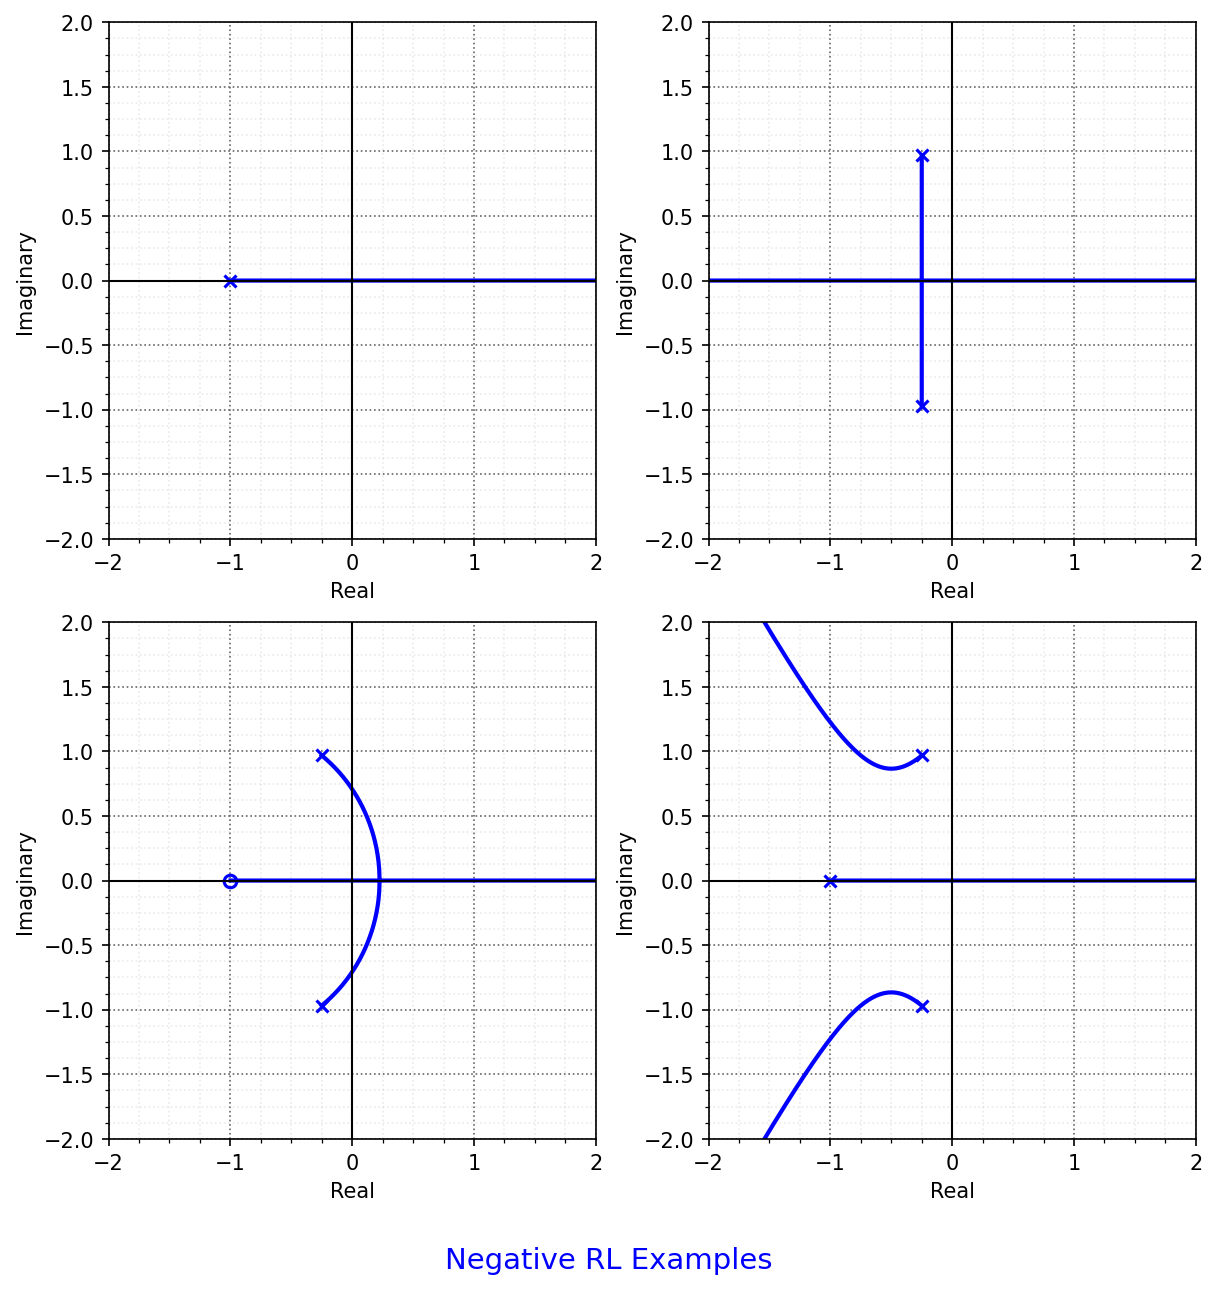

In [24]:
G0 = tf((1), np.convolve((1),(1, 1)))
G1 = tf((1), np.convolve((1,.5,1),(0, 1)))
G2 = tf((1, 1), np.convolve((1,.5,1),(0, 1)))
G3 = tf((1), np.convolve((1,.5,1),(1, 1)))

fig, ax = plt.subplots(2,2,figsize=(8, 8),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0,standard_locus=False), grid=False,color='b',ax=ax[0,0])
rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,standard_locus=False), grid=False,color='b',ax=ax[0,1])
rlist, klist = rlocus(G2, kvect=Root_Locus_gains(G2,standard_locus=False), grid=False,color='b',ax=ax[1,0])
rlist, klist = rlocus(G3, kvect=Root_Locus_gains(G3,standard_locus=False), grid=False,color='b',ax=ax[1,1])

[ax[x,y].set_xlim([-4, 1]) for x in range(2) for y in range(2)]
[ax[x,y].set_ylim([-4, 4]) for x in range(2) for y in range(2)]
[nicegrid(ax[x,y]) for x in range(2) for y in range(2)]

caption("Negative RL Examples",fig)
for kk in range(2):
    for ll in range(2):
        dim = 2
        ax[kk][ll].set_xlim([-dim, dim])
        ax[kk][ll].set_ylim([-dim, dim])
        ax[kk][ll].set_xlabel('Real')
        ax[kk][ll].set_ylabel('Imaginary')
savefig("./figs/Ex9_22n.pdf", dpi=600)
plt.show()